In [144]:
install.packages("countrycode")
install.packages("rworldmap")
install.packages("gifski")
install.packages("gapminder")
install.packages("cowplot")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message in install.packages("gifski"):
“installation of package ‘gifski’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [145]:
library('tidyverse')
library('ggplot2')
library('dplyr')
library('forcats')
library('mapdata')
library('ggrepel')
library('countrycode')
library('rworldmap')
library('gganimate')
library('gapminder')
library('gifski')
library('cowplot')

In [146]:
astronauts <- readr::read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-07-14/astronauts.csv'
)

Rows: 1277 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): name, original_name, sex, nationality, military_civilian, selectio...
dbl (13): id, number, nationwide_number, year_of_birth, year_of_selection, m...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [147]:
display_gif = function(gganim, ...){
    
    raw = suppressMessages(animate(gganim, ..., renderer = gifski_renderer()))
    
    contents = base64enc::base64encode(raw)
    tag = '<img src="data:image/gif;base64,%s">'
    
    IRdisplay::display_html(sprintf(tag, contents))
    
}

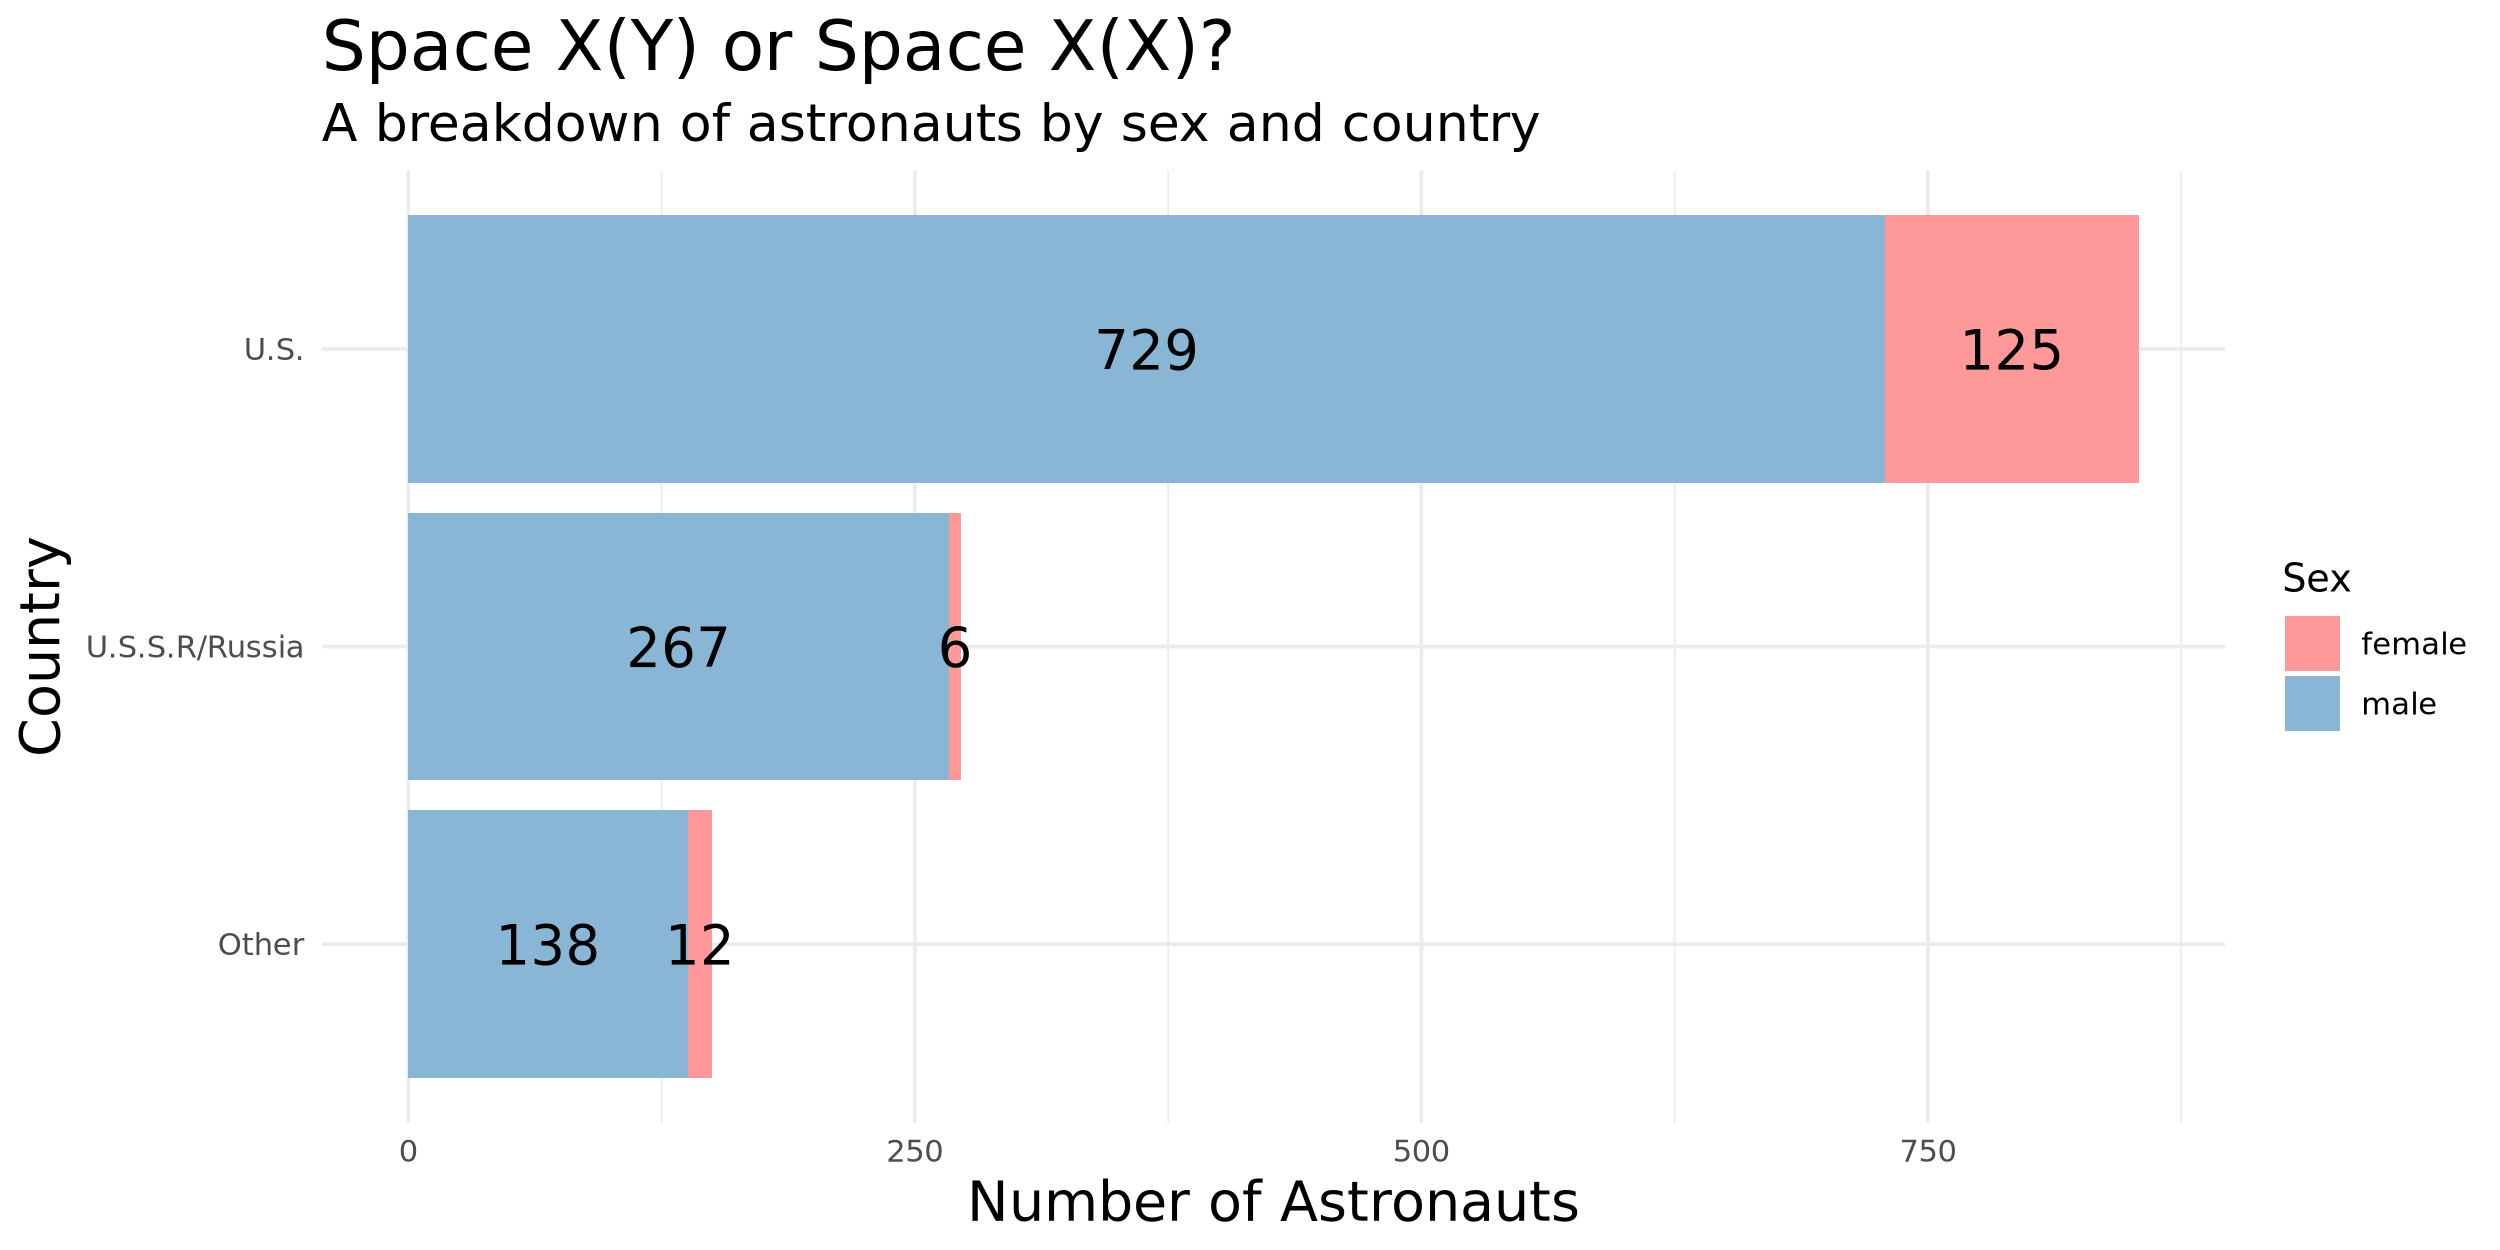

In [148]:
astronauts_lumped = astronauts %>%
    mutate(nat_lumped = nationality %>% fct_lump(n = 7))
options(repr.plot.width = 10, repr.plot.height = 5)

ast_lumped <- astronauts %>%
  mutate(nat_lumped = nationality %>% 
           fct_lump(n = 2) %>% 
           fct_infreq() %>% 
           fct_relevel('Other', after = Inf) %>% 
           fct_rev()) |>
  filter(!is.na(year_of_mission))

ggplot(ast_lumped, aes(y = nat_lumped, fill = sex)) +
geom_bar() +
geom_text(stat = "count", aes(label = ..count..), 
          position = position_stack(vjust = 0.5), 
          color = "black",
         size=5.5) +
  theme_minimal() +
  labs(
    title = "Space X(Y) or Space X(X)?",
      subtitle = "A breakdown of astronauts by sex and country",
    y = "Country",
    x = "Number of Astronauts",
    fill = "Sex"
  ) + 
theme(
    plot.title = element_text(size = 20),  
    plot.subtitle = element_text(size = 15),
    axis.title.x = element_text(size = 16),  
    axis.title.y = element_text(size = 16)   
  ) +
scale_fill_manual(values = c(
     "female" = "#FF9999",
    "male" = "#8AB6D6"))

# Figure 1. Space X(Y) or Space X(X) 
Figure 1 visualizes the sex of astronauts for US, Russia, and all other countries condensed into "Other". The title makes a pun combining space and genetics while posing the question of whether astronauts are predominantly male. As seen in Figure 1, the overwhelming majority of astronauts across time (1960-2020) have been men. This holds true for every country that has produced an astronaut. The US has produced the most female astronauts (125), but they have also put the most astronauts into space in total. Even when combining all other countries that have sent an astronaut into space into one group, it is still much less than both the US and Russia individually. 

In [152]:
#condesing the nationalities into continents (but fixing typos and labeling first from the data set)
astronauts <- astronauts %>%
    mutate(nationality = case_when(
    nationality == "Czechoslovakia" ~ "Czech Republic",
    nationality == "Hungry" ~ "Hungary",
    nationality == "Malysia" ~ "Malaysia",
    nationality == "Netherland" ~ "Netherlands",
    nationality == "U.K./U.S." ~ "United Kingdom",
    nationality == "U.S.S.R/Russia" ~ "Russia",
    nationality == "U.S.S.R/Ukraine" ~ "Ukraine",
    TRUE ~ nationality 
  )) |>
  mutate(continent = countrycode(nationality, origin = "country.name", destination = "continent")) 


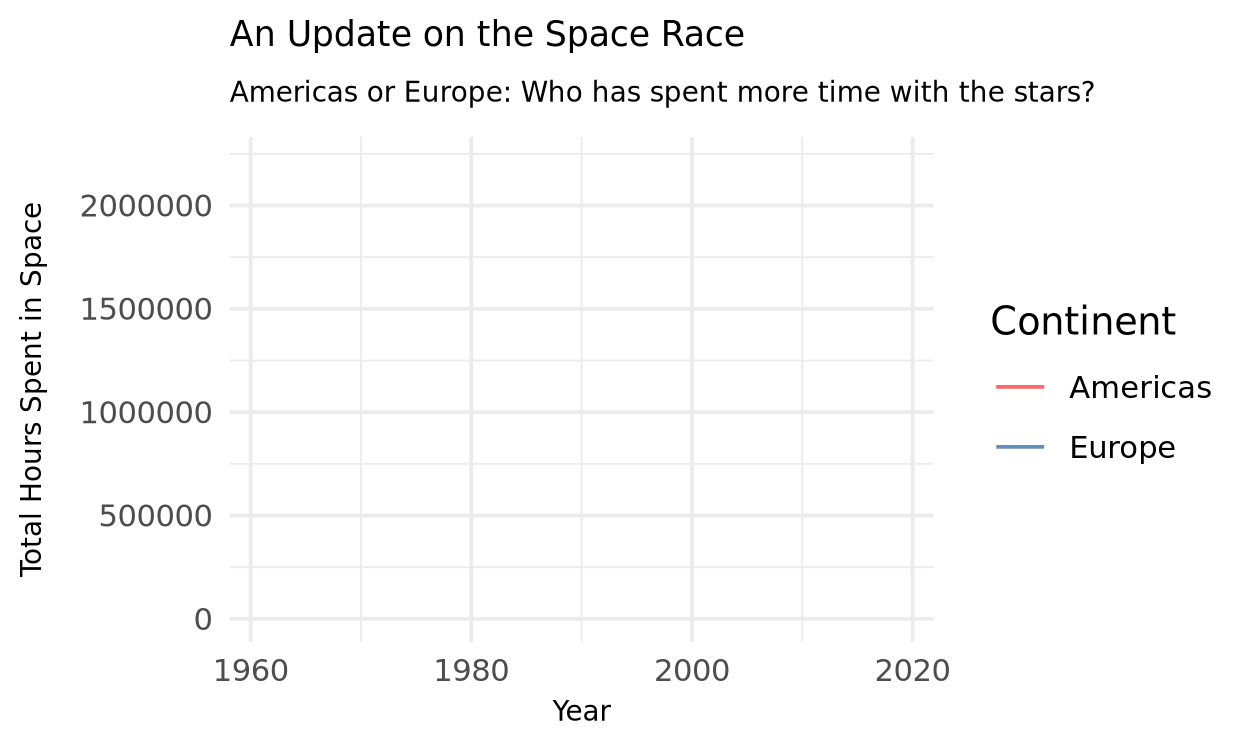

In [153]:
options(repr.plot.width=7, repr.plot.height = 4)
astronauts_clean = astronauts |>
  group_by(continent, year_of_mission) |>
  filter(!continent %in% c("Oceania", "Asia", "Africa")) |>
  arrange(year_of_mission) |>
  group_by(continent) |>
  mutate(total_hrs_sum = ifelse(is.na(total_hrs_sum), 
                                approx(year, total_hrs_sum, year)$y, 
                                total_hrs_sum)) |>
  mutate(cumulative_hrs = cumsum(total_hrs_sum)) |>
  ungroup()

anim = ggplot(astronauts_clean, aes(x=year_of_mission, y=cumulative_hrs, color=continent)) + 
geom_line(na.rm = TRUE) + 
theme_minimal() + 
labs(
    title = "An Update on the Space Race",
      subtitle = "Americas or Europe: Who has spent more time with the stars?",
    y = "Total Hours Spent in Space",
    x = "Year",
    color = "Continent"
  ) +
theme(
    plot.title = element_text(size = 10),  
    plot.subtitle = element_text(size = 8),
    axis.title.x = element_text(size = 8),  
    axis.title.y = element_text(size = 8)   
  ) +
scale_color_manual(values = c(
    "Americas" = "#FF6666",
    "Europe" = "#5F8FBF")) +
  transition_time(year_of_mission) + enter_fade() + exit_fade() +ease_aes('linear') 
display_gif(anim, width = 5, height = 3, units = 'in', res = 250, duration=0.5) 

# Figure 2: An Update on the Space Race
This figure is an animation showing the cumulative number of hours each country has spent in space over time (and the lines even race!). This figure provides interesting insight when comparing it to Figure 1. In this data set, Russia is categorized as part of Europe. When combining Russia's efforts in space with the rest of Europe, they outdo America by about a million hours. Although America has sent more people into space, Russia's missions are typically longer which results in a faster accumulation of hours. When deciding who is currently winning the space race, it depends on whether you quanitfy success as the number of astronauts sent to space or the amount of time spent in space overall. So, if we are deciding based on number of astronauts, the Americas win as demonstrated in Figure 1. But, if we are deciding based on time, Europe has spent more time with the stars.

function (data = NULL, mapping = aes(), ..., environment = parent.frame()) 
{
    UseMethod("ggplot")
}
<bytecode: 0x561914c65df0>
<environment: namespace:ggplot2>

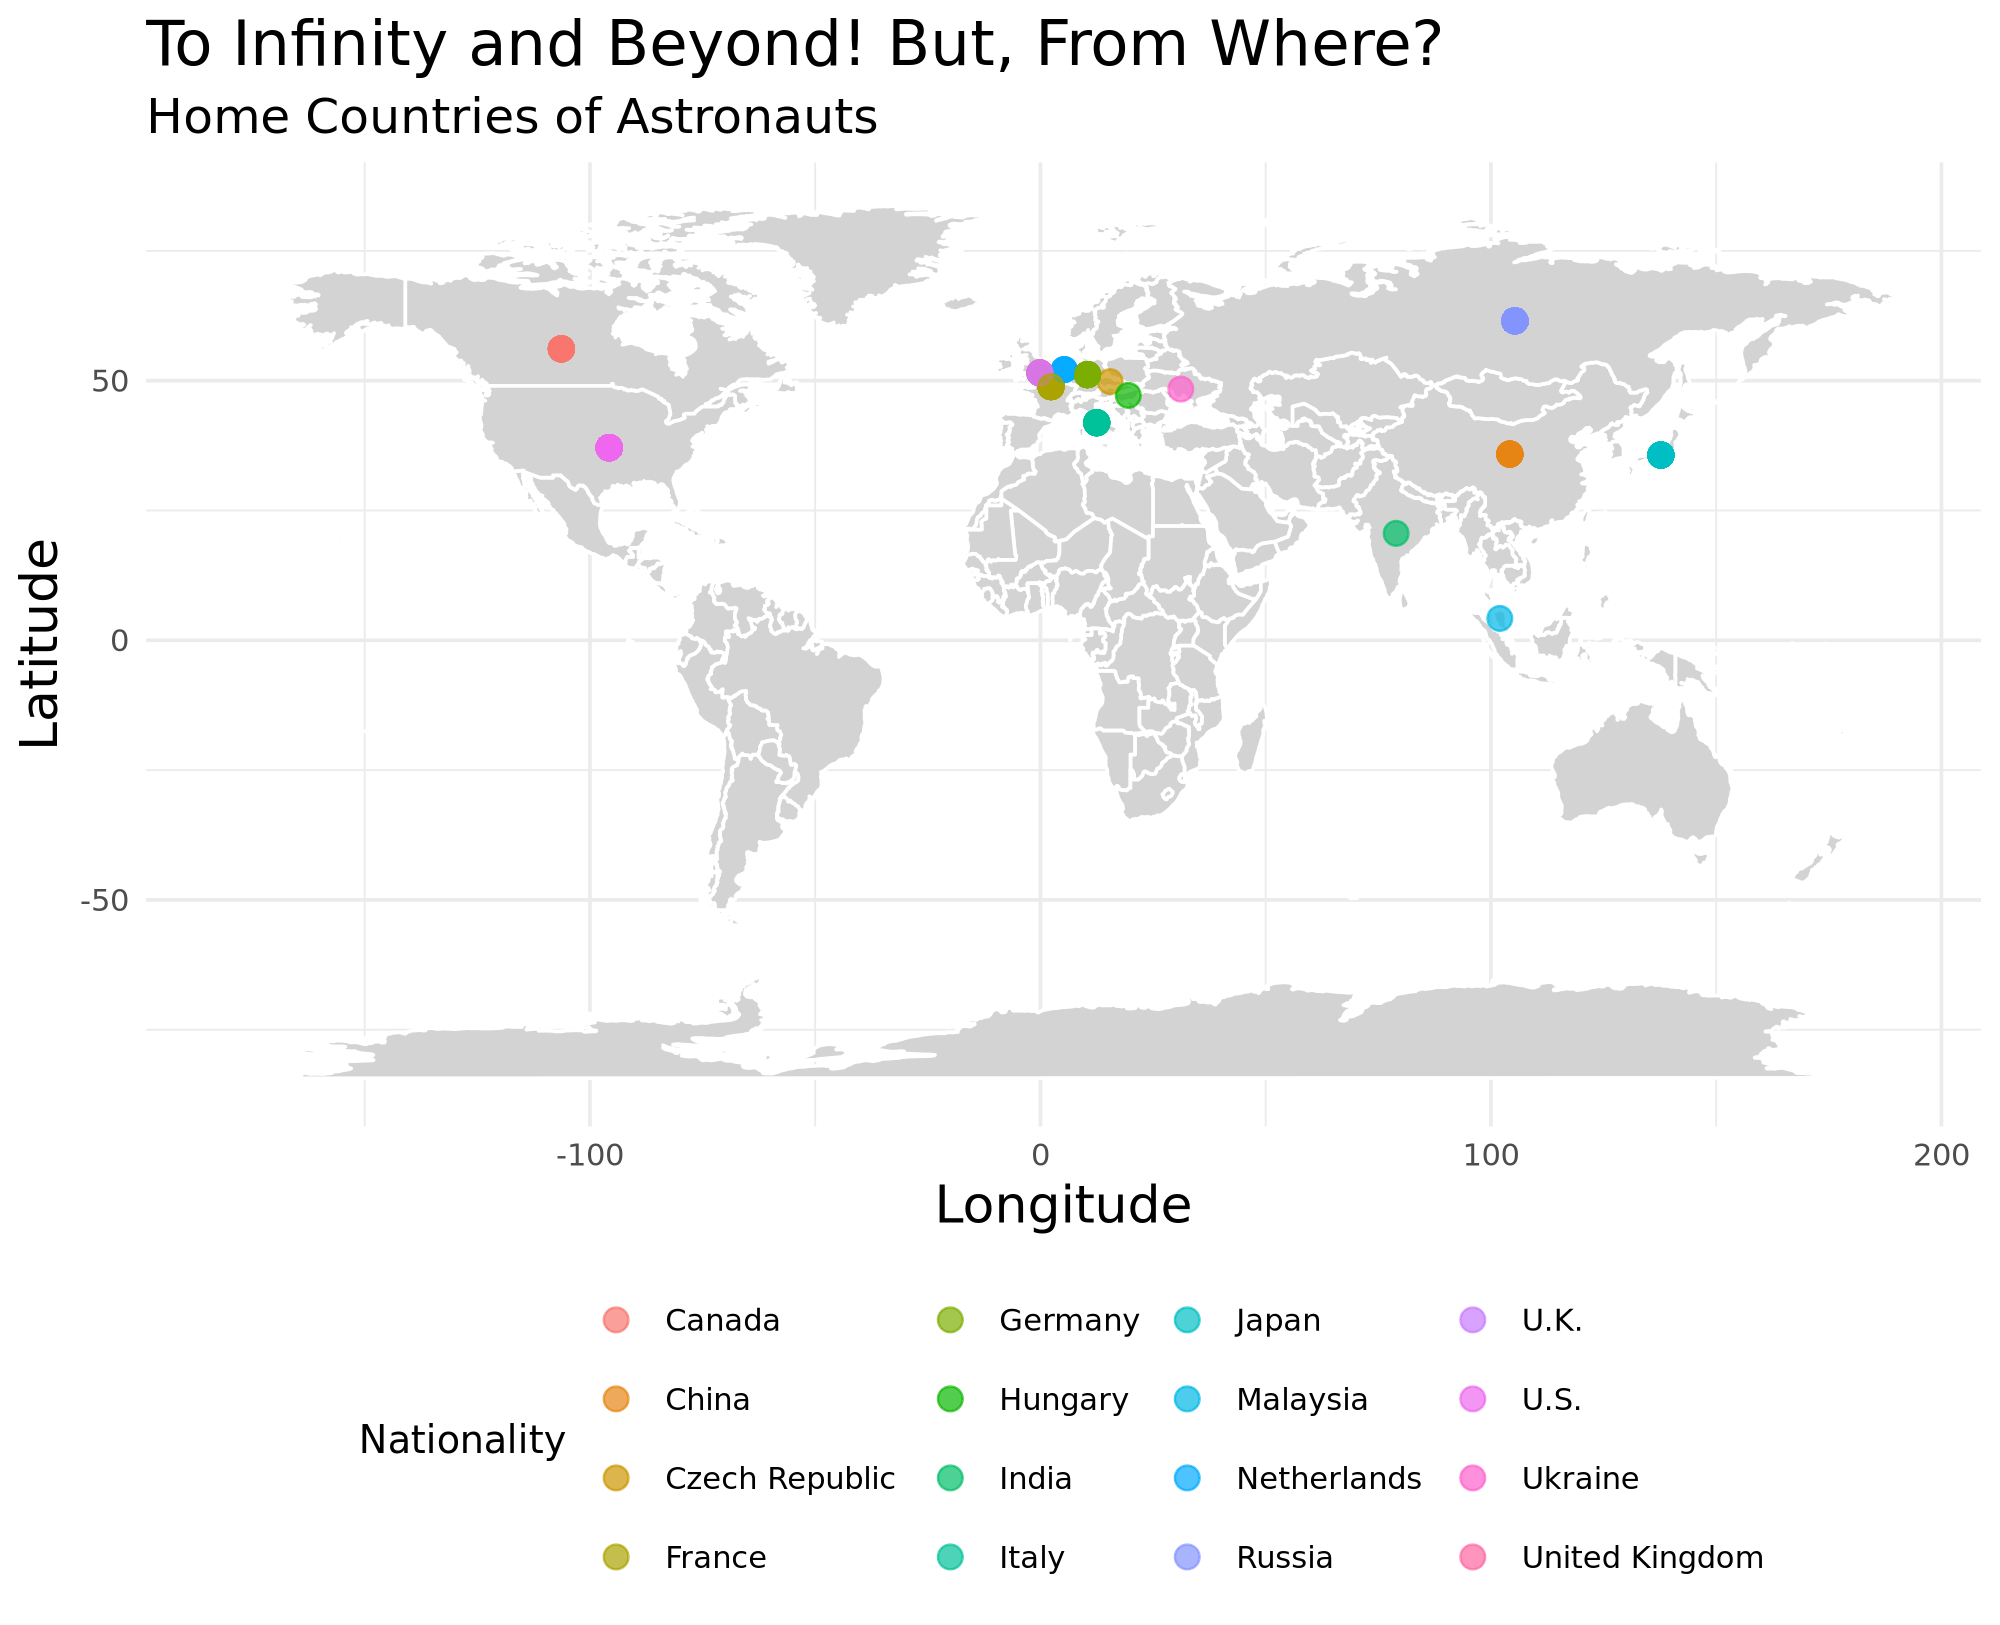

In [151]:
options(repr.plot.width=8, repr.plot.height = 6.5)
suppressWarnings(
astronauts_clean <- astronauts %>%
  mutate(
    country_code = countrycode(nationality, "country.name", "iso2c")
  ) %>%
  mutate(
    country_code = case_when(
      nationality == "Czechoslovakia" ~ "CZ", 
      nationality == "Hungary" ~ "HU", 
      nationality == "Malysia" ~ "MY", 
      nationality == "Netherland" ~ "NL",
      nationality == "U.K./U.S." ~ "US", 
      nationality == "U.S.S.R/Russia" ~ "RU", 
      nationality == "U.S.S.R/Ukraine" ~ "UA", 
      TRUE ~ country_code
    )
  ))

country_coords <- data.frame(
  country_code = c("US", "RU", "CN", "DE", "IN", "GB", "FR", "CA", "JP", "IT", 
                   "CZ", "HU", "MY", "NL", "UA"),
  longitude = c(-95.7129, 105.3188, 104.1954, 10.4515, 78.9629, -0.1276, 2.3522, -106.3468, 137.7262, 12.4964,
                15.4731, 19.5033, 101.9758, 5.2913, 31.1656),
  latitude = c(37.0902, 61.5240, 35.8617, 51.1657, 20.5937, 51.5074, 48.8566, 56.1304, 35.6762, 41.9028,
               49.8175, 47.1625, 4.2105, 52.1326, 48.3794)
)

astronauts_coords <- astronauts_clean %>%
  left_join(country_coords, by = "country_code")

astronauts_coords <- astronauts_coords %>%
  filter(!is.na(longitude) & !is.na(latitude))

ggplot() +
  geom_polygon(data = map_data("world"), aes(x = long, y = lat, group = group), fill = "lightgray", color = "white") +
  geom_point(data = astronauts_coords, aes(x = longitude, y = latitude, color = nationality), size = 3, alpha = 0.7) +
  theme_minimal() +
  labs(
    title = "To Infinity and Beyond! But, From Where?",
      subtitle = "Home Countries of Astronauts",
    x = "Longitude",
    y = "Latitude",
    color = "Nationality"
  ) +
theme(
    plot.title = element_text(size = 18),  
    plot.subtitle = element_text(size = 14),
    axis.title.x = element_text(size = 15),  
    axis.title.y = element_text(size = 15)   
  ) +
  theme(legend.position = "bottom") 
ggplot

# Figure 3. To Infinity and Beyond! But, From Where? 
Since the data from Figure 1 and Figure 2 are condensed into major contributing countries or continents, I wanted to include a visualization showing where all of the astronauts in this data set were from originally. This shows the variety in nationalities across all astronauts and highlights how diverse space really is! Although America and Russia typically make all of the headlines, this map highlights some of the lesser discussed nationalities. 